In [ ]:
# how do we optimally weight importance and time on each goal to calculate the intention behavior gap

# Load Libraries

In [2]:
library(tidyverse)
library(data.table)
library(psych)

── Attaching packages ────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# Load Data

In [3]:
load('../../3_1_2_processed_data/VIB_measure_cleaned_data2022-05-19.RData')

This loads:

- `q_df` | the full Qualtrics dataframe with text responses
- `qn_df` | full Qualtrics dataframe with numeric responses
- `ib_measures_df` | Intention behavior gap measures
- `validation_measures` | Individual difference questionnaires
- `demographics` | Basic demographics
- `ib_gap_domains` | Individual domain gaps

# Analysis

For now just looking at last run of subjects with the full array of outcome variavbles and predictors.

## Match Test/Retest Subjects

## Multivariate Multiple Regression

In [4]:
qn_df$version

[1] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
  [7] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [13] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [19] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [25] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [31] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [37] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [43] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [49] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [55] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [61] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [67] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [73] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [79] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [85] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [91] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
 [97] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
[103] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
[109] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
[115] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
[121] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
[127] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
[133] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
[139] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
[145] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
[151] "vib"       "vib"       "vib"       "vib"       "vib"       "vib"      
[157] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[163] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[169] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[175] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[181] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[187] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[193] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[199] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[205] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[211] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[217] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[223] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[229] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[235] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[241] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[247] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[253] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[259] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[265] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[271] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[277] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[283] "ib"        "ib"        "ib"        "ib"        "ib"        "ib"       
[289] "ib"        "ib_retest" "ib_retest" "ib_retest" "ib_retest" "ib_retest"
[295] "ib_retest" "ib_retest" "ib_retest" "ib_retest" "ib_retest" "ib_retest"
[301] "ib_retest" "ib_retest" "ib_retest" "ib_retest" "ib_retest" "ib_retest"
[307] "ib_retest" "ib_re

**NOTE**
- `ib_domains_time` and `ib_domains_effort` are just present in the retest...

Also `amount` jsut started in the 3rd SONA chunk (`version = ib`) so we will just focus on that group for the moment

In [5]:
# predictors
predictors = c('ib_domain_import', 'ib_domain_amount', 'ib_domain_success', 'subjectID')

pred_df = qn_df[qn_df$version == 'ib',] %>%
    select(starts_with(predictors))

# subject to factor
pred_df$subjectID <- factor(pred_df$subjectID)

In [6]:
gap = pred_df %>%
    select(starts_with('ib_domain_success'), subjectID) %>%
    pivot_longer(
        cols = !subjectID,
        names_to = NULL,
        values_to = "gap",
        values_drop_na = TRUE
    )
gap$gap = 100-as.numeric(gap$gap)

import = pred_df %>%
    select(starts_with('ib_domain_import'), subjectID) %>%
    pivot_longer(
        cols = !subjectID,
        names_to = NULL,
        values_to = "import",
        values_drop_na = TRUE
    )

amount = pred_df %>%
    select(starts_with('ib_domain_amount'), subjectID) %>%
    pivot_longer(
        cols = !subjectID,
        names_to = NULL,
        values_to = "amount",
        values_drop_na = TRUE
    )

In [8]:
# outcomes
valid_df = validation_measures[!is.na(validation_measures$subjectHappy_score), !is.na(validation_measures[326,])]

# subject to factor
valid_df$subjectID <- factor(valid_df$subjectID)
# remove unneeded col
valid_df$socialD_score <- NULL 

In [9]:
# remove predictive validations
outcomes_df = subset(valid_df, select = -c(ambition_score, bscs_score, future_score, grit_score))

In [229]:
write.csv(outcomes_df, "../../3_1_2_processed_data/SONA3_outcomes.csv", row.names = FALSE)

In [10]:
df = cbind(gap, import[,2], amount[,2])

In [11]:
df$amount = as.numeric(df$amount)
df$import = as.numeric(df$import)

head(df)

,subjectID,gap,import,amount
,<fct>,<dbl>,<dbl>,<dbl>
1,157,58,7,1.0
2,157,49,7,8.0
3,157,1,4,0.5
4,157,78,7,3.0
5,157,3,7,1.0
6,157,83,7,3.0


## Averaging Outcomes

Create lm of each outcome measure and take the average of the beta weights...

In [12]:
head(valid_df)

,subjectID,ambition_score,bscs_score,flourish_score,future_score,grit_score,harmony_score,qualityLife_score,swl_cantril_ladder,SWL5_score,self_esteem_single_1,subjectHappy_score
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
157,157,3.0,2.076923,4.625,3.9,2.625,4.8,3.8750,8,5.6,6,4.50
158,158,4.0,3.000000,6.000,5.5,2.875,5.6,6.0000,5,5.6,3,5.75
159,159,4.2,4.846154,5.750,4.8,4.125,6.4,6.1875,5,4.2,5,4.75
160,160,3.8,3.153846,4.875,4.6,3.250,5.0,4.5000,4,3.6,6,5.75
161,161,2.4,2.384615,5.125,4.1,1.875,5.6,5.0000,6,3.6,2,2.25
162,162,3.2,3.076923,5.625,5.7,3.375,4.6,5.0625,7,5.2,4,4.50


In [13]:
dff = merge(df_scale, valid_df[,c('subjectID', 'future_score')], by = 'subjectID')

ERROR: Error in merge(df_scale, valid_df[, c("subjectID", "future_score")], by = "subjectID"): object 'df_scale' not found


## Econometrics Version

## PCA

In [14]:
# PCA on validation outcome measures

set.seed(111)
ind <- sample(2, nrow(outcomes_df),
              replace = TRUE,
              prob = c(0.8, 0.2))
training <- outcomes_df[ind==1,]
testing <- outcomes_df[ind==2,]

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

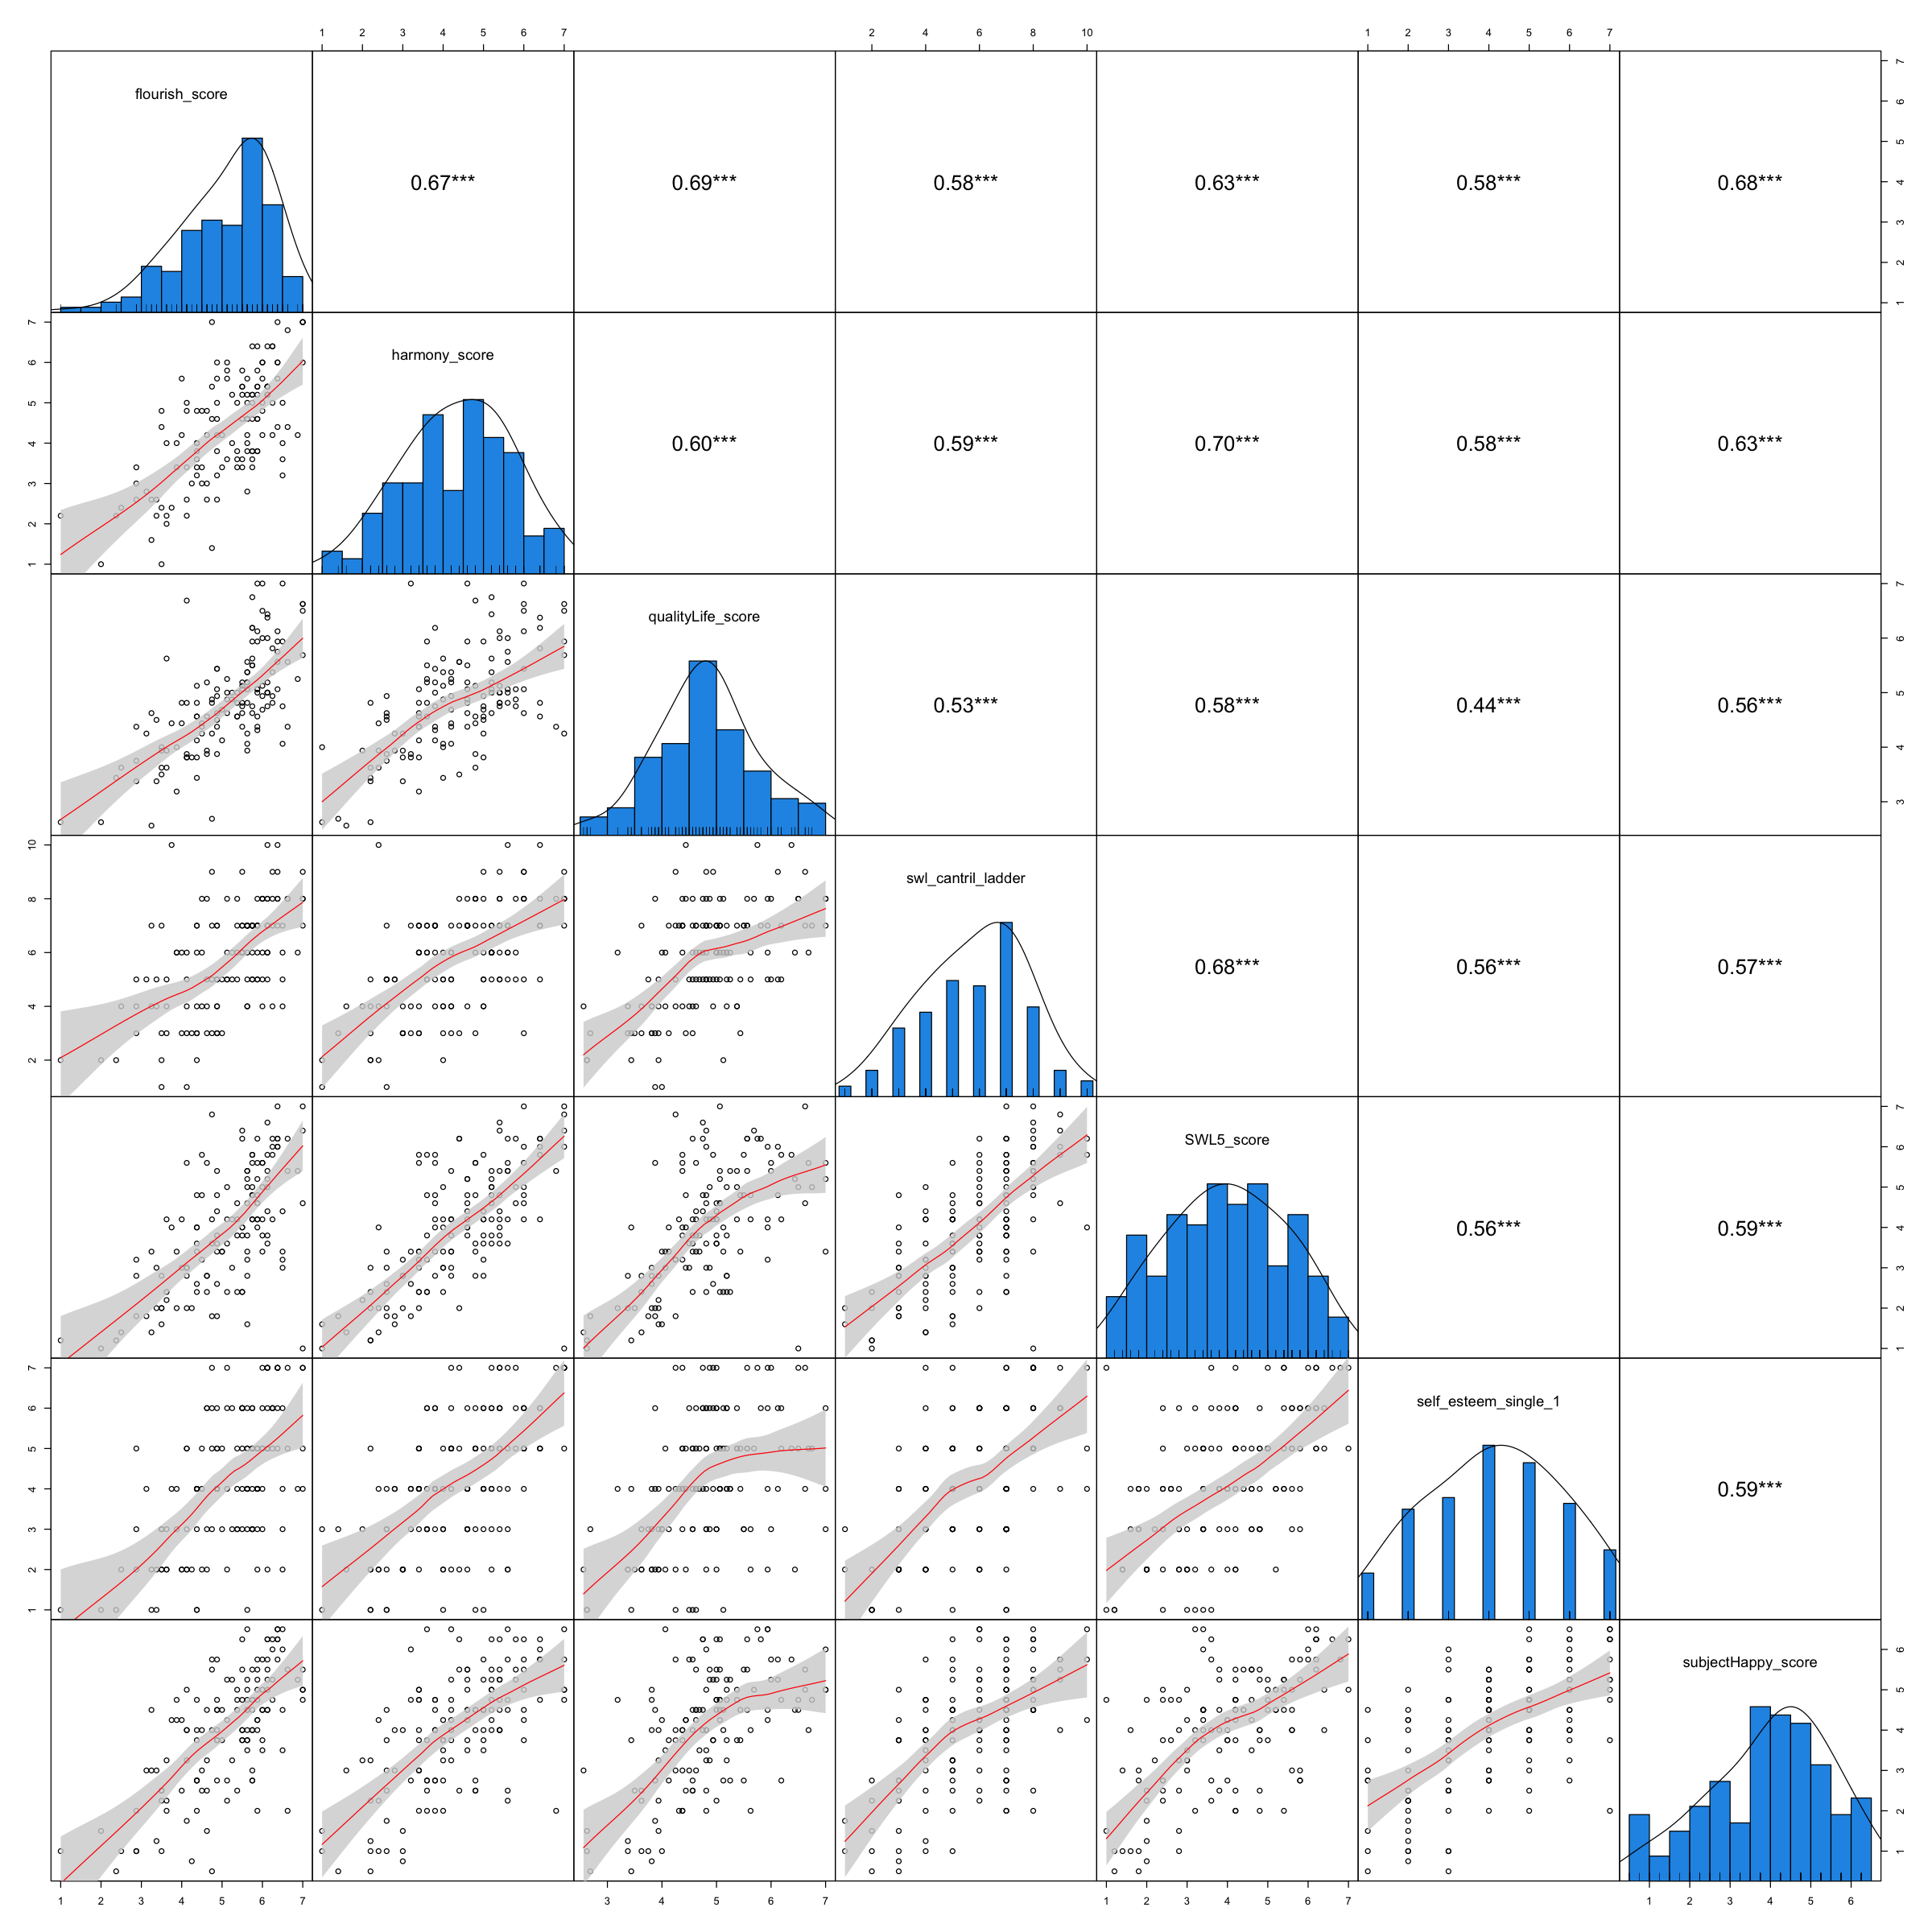

In [15]:
options(repr.plot.width = 20, repr.plot.height = 20)

pairs.panels(training[,-1],
             smooth = TRUE,      # If TRUE, draws loess smooths
             scale = FALSE,      # If TRUE, scales the correlation text font
             density = TRUE,     # If TRUE, adds density plots and histograms
             ellipses = FALSE,    # If TRUE, draws ellipses
             method = "pearson", # Correlation method (also "spearman" or "kendall")
             pch = 21,           # pch symbol
             lm = FALSE,         # If TRUE, plots linear fit rather than the LOESS (smoothed) fit
             cor = TRUE,         # If TRUE, reports correlations
             jiggle = FALSE,     # If TRUE, data points are jittered
             factor = 2,         # Jittering factor
             hist.col = 4,       # Histograms color
             stars = TRUE,       # If TRUE, adds significance level with stars
             ci = TRUE,
             cex.labels=1.4,
            gap=0)          # If TRUE, adds confidence intervals

In [16]:
# pca but remove subjectID column

pc <- prcomp(training[,-1],
             center = TRUE,
            scale. = TRUE)
attributes(pc)

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

In [17]:
pc$center

flourish_score        harmony_score    qualityLife_score 
            5.114051             4.363504             4.842153 
  swl_cantril_ladder           SWL5_score self_esteem_single_1 
            5.788321             4.000000             4.145985 
  subjectHappy_score 
            4.014599

In [18]:
pc$scale

flourish_score        harmony_score    qualityLife_score 
            1.145290             1.346503             0.931879 
  swl_cantril_ladder           SWL5_score self_esteem_single_1 
            1.957003             1.469494             1.673936 
  subjectHappy_score 
            1.469908

In [19]:
print(pc)

Standard deviations (1, .., p=7):
[1] 2.1442464 0.7708191 0.7131888 0.6281890 0.6069995 0.5200881 0.5156020

Rotation (n x k) = (7 x 7):
                           PC1         PC2          PC3         PC4         PC5
flourish_score       0.3981489 -0.29246213  0.252268273 -0.05915920  0.07083824
harmony_score        0.3929782 -0.02621502 -0.106983501  0.68638168 -0.10693913
qualityLife_score    0.3603508 -0.67285363 -0.003473341 -0.20907432  0.40102533
swl_cantril_ladder   0.3694023  0.29880299 -0.528607210 -0.59499061 -0.05124680
SWL5_score           0.3904189  0.09987001 -0.490381591  0.29788990 -0.07295712
self_esteem_single_1 0.3523470  0.60111672  0.442301508  0.02030191  0.54170668
subjectHappy_score   0.3796834  0.02116885  0.457572807 -0.19622417 -0.72203154
                             PC6        PC7
flourish_score        0.79605107  0.2238055
harmony_score        -0.26122120  0.5316419
qualityLife_score    -0.43203038 -0.1619246
swl_cantril_ladder   -0.05066089  0.3682751
SWL

In [20]:
summary(pc)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1442 0.77082 0.71319 0.62819 0.60700 0.52009 0.51560
Proportion of Variance 0.6568 0.08488 0.07266 0.05637 0.05264 0.03864 0.03798
Cumulative Proportion  0.6568 0.74171 0.81437 0.87074 0.92338 0.96202 1.00000

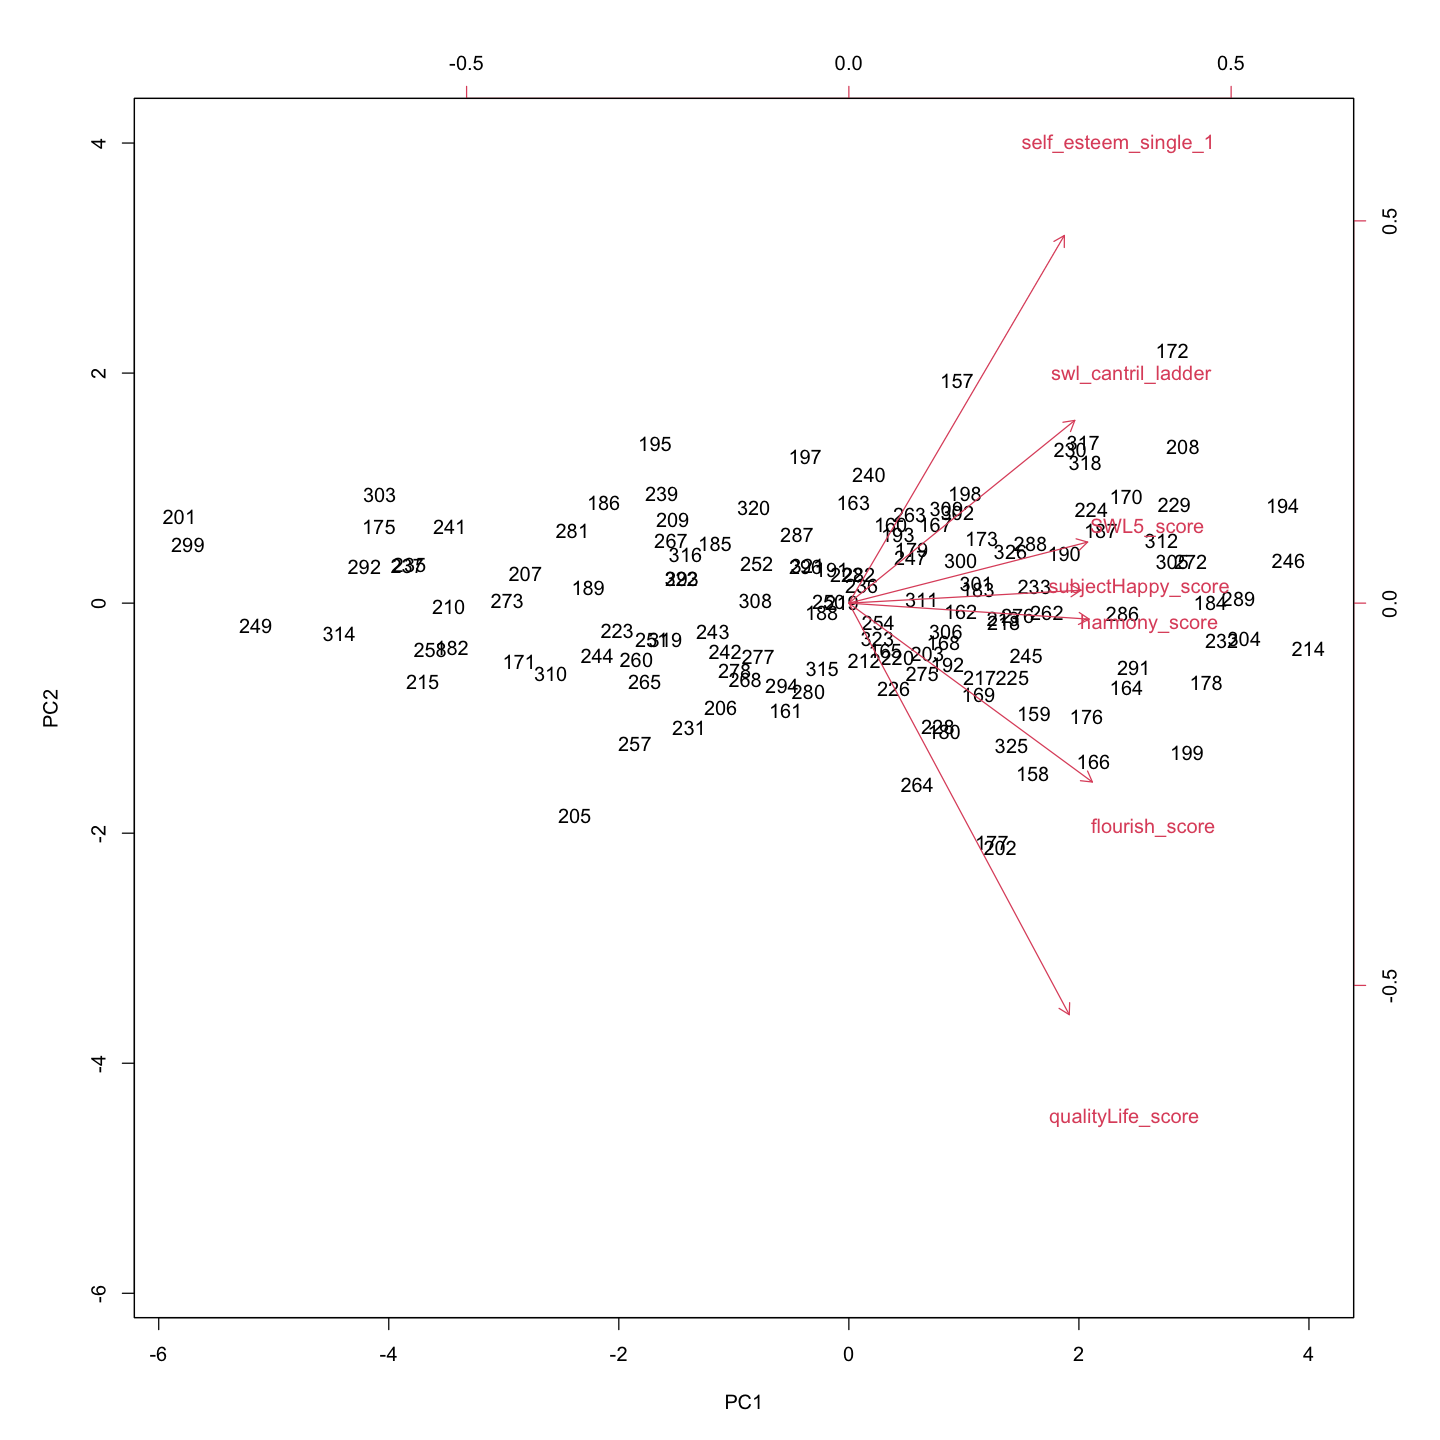

In [21]:
options(repr.plot.width = 12, repr.plot.height = 12)
biplot(pc, scale = 0)

In [24]:
# add pc column to training data

training$pc = pc$x[,"PC1"]

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

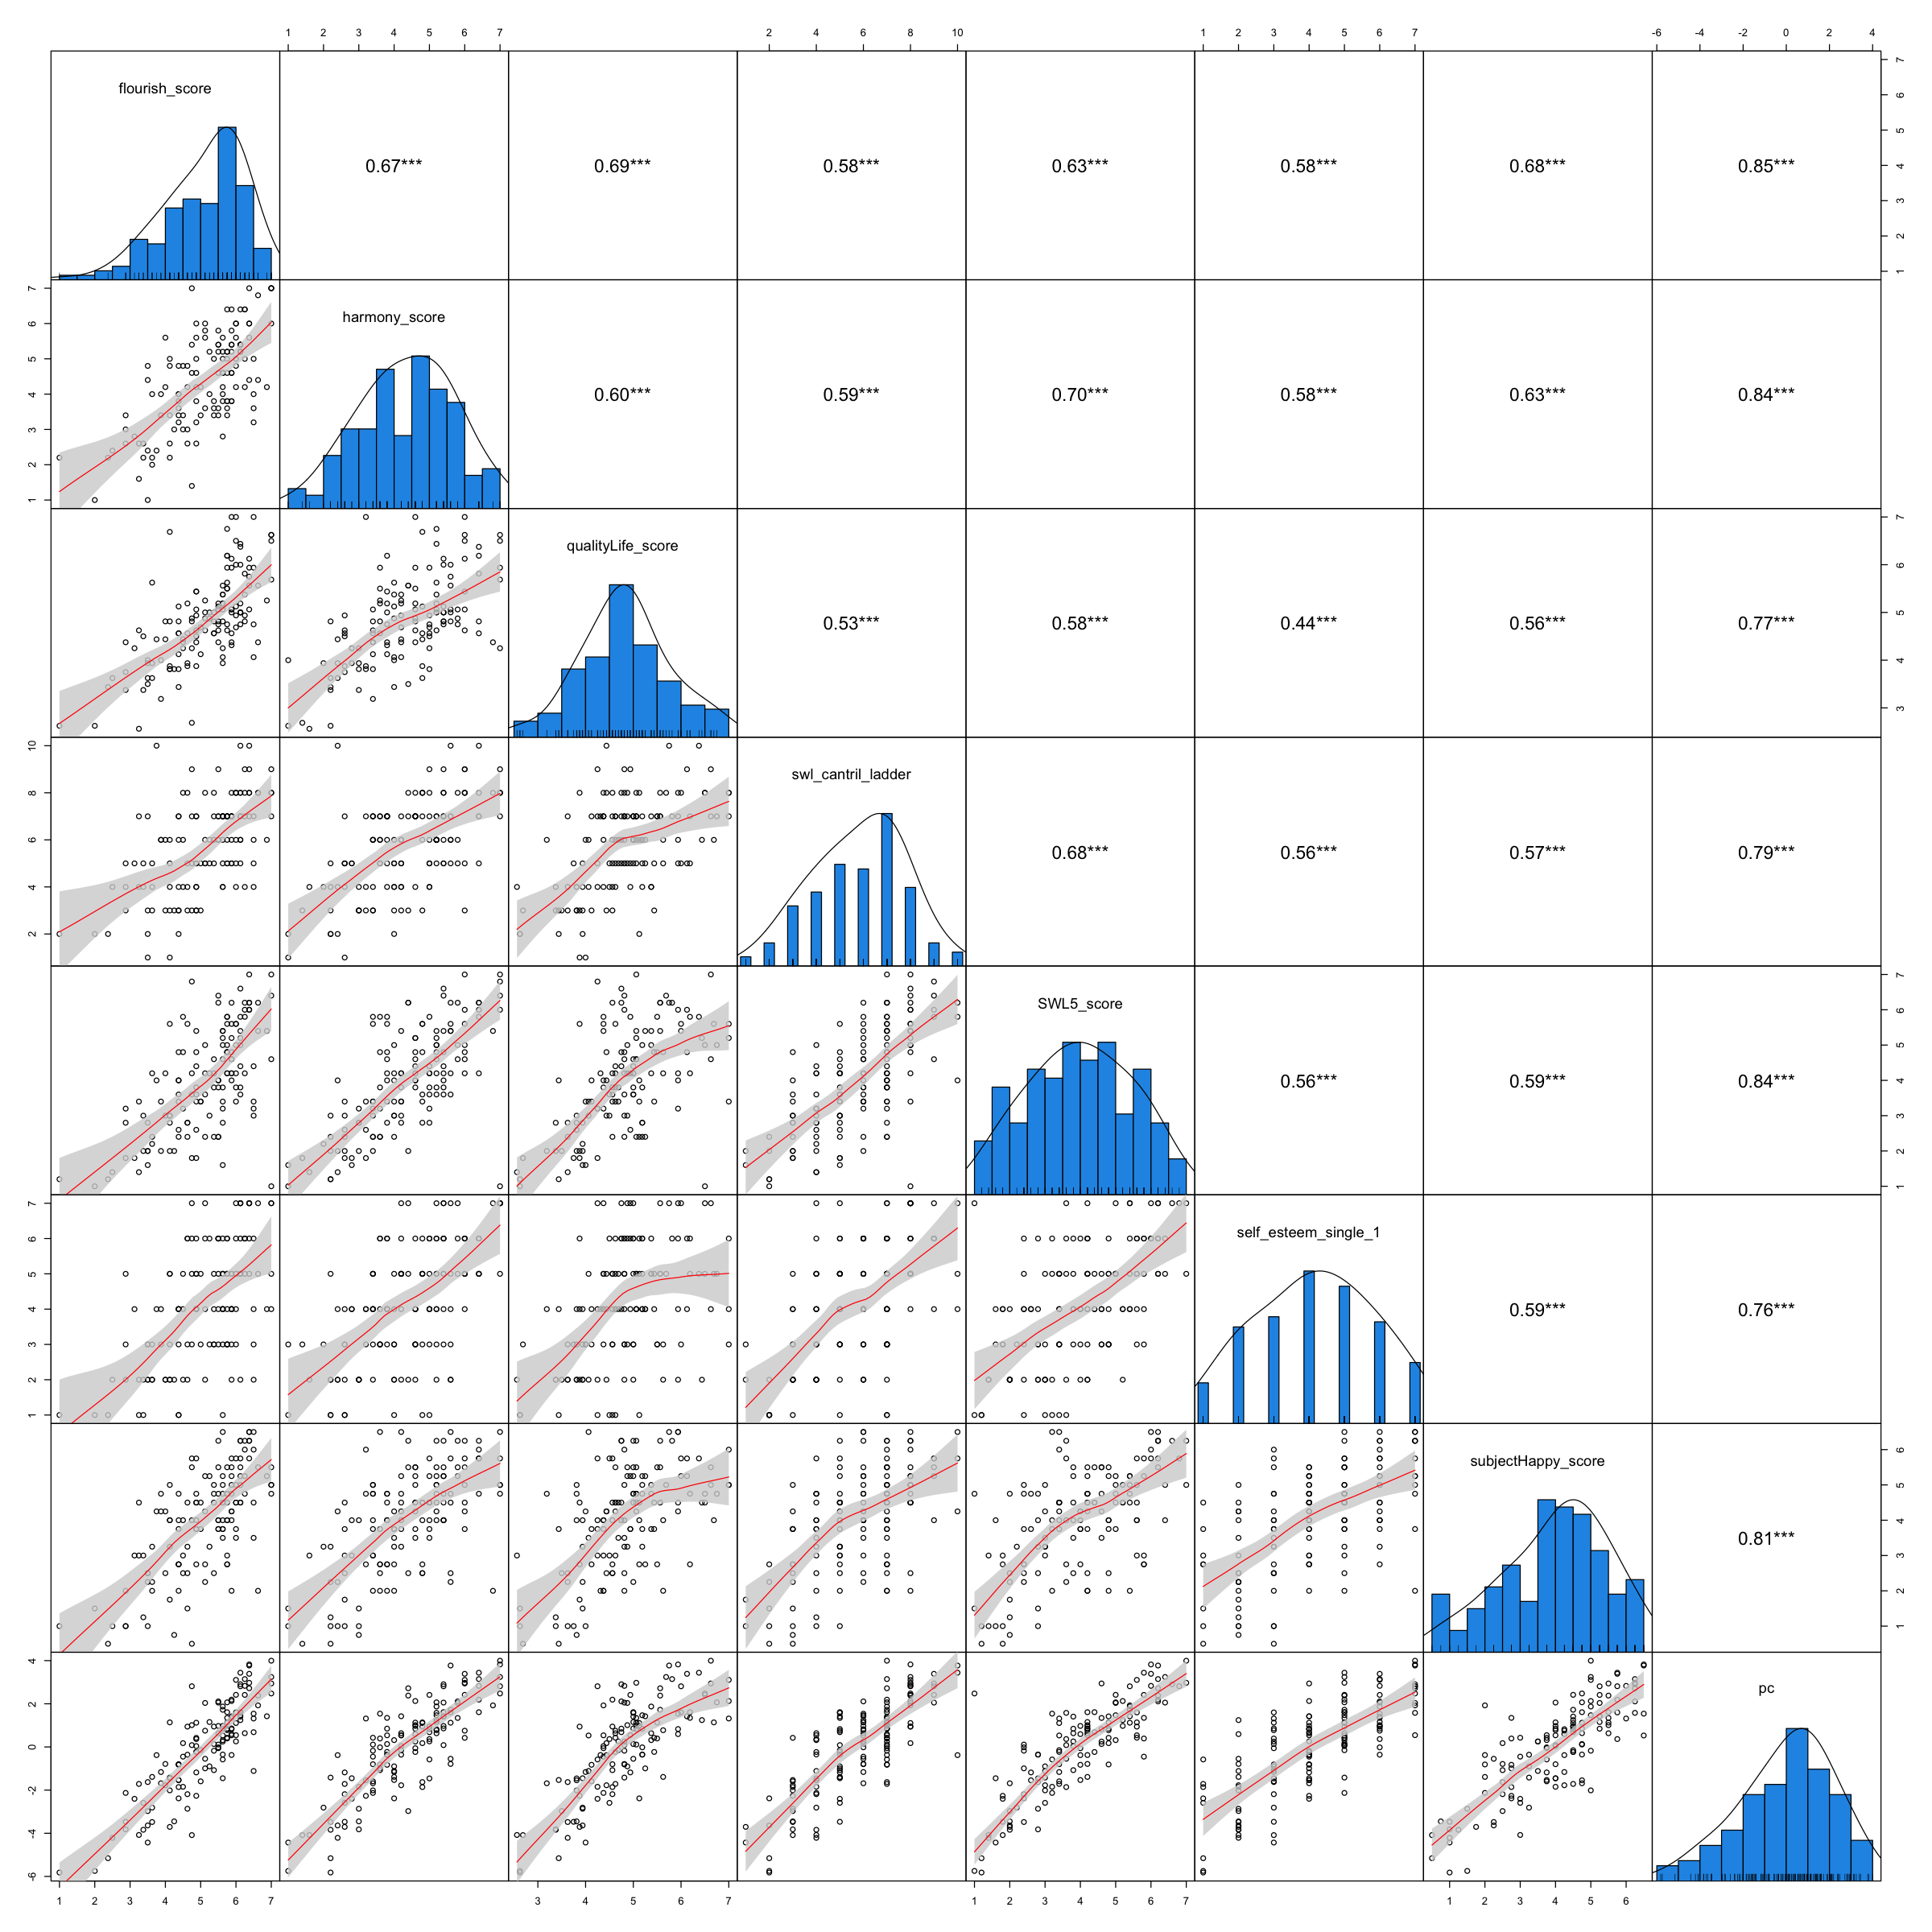

In [25]:
options(repr.plot.width = 20, repr.plot.height = 20)

pairs.panels(training[,-1],
             smooth = TRUE,      # If TRUE, draws loess smooths
             scale = FALSE,      # If TRUE, scales the correlation text font
             density = TRUE,     # If TRUE, adds density plots and histograms
             ellipses = FALSE,    # If TRUE, draws ellipses
             method = "pearson", # Correlation method (also "spearman" or "kendall")
             pch = 21,           # pch symbol
             lm = FALSE,         # If TRUE, plots linear fit rather than the LOESS (smoothed) fit
             cor = TRUE,         # If TRUE, reports correlations
             jiggle = FALSE,     # If TRUE, data points are jittered
             factor = 2,         # Jittering factor
             hist.col = 4,       # Histograms color
             stars = TRUE,       # If TRUE, adds significance level with stars
             ci = TRUE,
             cex.labels=1.4,
            gap=0)          # If TRUE, adds confidence intervals

In [26]:
# join training data pc to df

df_fit = merge(df, training[,c("subjectID", "pc")], by = "subjectID")

Have different scales - in particular for `gap`...

Will rescale to be 1-7 like import...amount is weird since it is actual time...

In [27]:
write.csv(df_fit, "../../3_1_2_processed_data/SONA3_unscaled.csv", row.names = FALSE)
write.csv(valid_df, "../../3_1_2_processed_data/SONA3_outcomes.csv", row.names = FALSE)

In [28]:
# put gap on same scale as import and amount
df_fit$gap = df_fit$gap * 7/100

In [29]:
write.csv(df_fit, "../../3_1_2_processed_data/SONA3_gapScaled.csv", row.names = FALSE)
head(df_fit)

,subjectID,gap,import,amount,pc
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,157,3.43,7,8.0,0.9415867
2,157,0.21,7,1.0,0.9415867
3,157,5.81,7,3.0,0.9415867
4,157,4.27,7,2.0,0.9415867
5,157,3.64,6,2.0,0.9415867
6,157,0.07,4,0.5,0.9415867


In [30]:
df_scale = cbind(select(df_fit, subjectID), scale(df_fit[,-1]))

In [253]:
write.csv(df_scale, "../../3_1_2_processed_data/SONA3_scaledCentered.csv", row.names = FALSE)
head(df_scale)

,subjectID,gap,import,amount,pc
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,157,0.1505994,0.9398907,0.77981082,0.3312102
2,157,-1.3684789,0.9398907,-0.42740633,0.3312102
3,157,1.2733965,0.9398907,-0.08248715,0.3312102
4,157,0.5468807,0.9398907,-0.25494674,0.3312102
5,157,0.2496697,0.2842899,-0.25494674,0.3312102
6,157,-1.4345258,-1.0269116,-0.51363613,0.3312102


In [31]:
library("lme4")

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [35]:
m = lm(pc~gap*import, data=df_fit)
summary(m)


Call:
lm(formula = pc ~ gap * import, data = df_fit)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2250 -1.4302  0.3169  1.4126  4.3954 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.44258    0.36087   1.226   0.2202  
gap         -0.08554    0.07923  -1.080   0.2804  
import       0.08951    0.05917   1.513   0.1305  
gap:import  -0.02622    0.01358  -1.930   0.0538 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.045 on 2000 degrees of freedom
Multiple R-squared:  0.05581,	Adjusted R-squared:  0.05439 
F-statistic:  39.4 on 3 and 2000 DF,  p-value: < 2.2e-16


In [36]:
m = lm(pc~gap*import, data=df_scale)
summary(m)


Call:
lm(formula = pc ~ gap * import, data = df_scale)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9596 -0.6800  0.1507  0.6716  2.0898 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.011485   0.022523  -0.510   0.6101    
gap         -0.233279   0.022672 -10.289   <2e-16 ***
import       0.005774   0.023397   0.247   0.8051    
gap:import  -0.040300   0.020881  -1.930   0.0538 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9724 on 2000 degrees of freedom
Multiple R-squared:  0.05581,	Adjusted R-squared:  0.05439 
F-statistic:  39.4 on 3 and 2000 DF,  p-value: < 2.2e-16


In [37]:
m = lm(pc~gap*import+gap*amount, data=df_fit)
summary(m)


Call:
lm(formula = pc ~ gap * import + gap * amount, data = df_fit)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2222 -1.4309  0.3161  1.4134  4.3983 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  4.373e-01  3.616e-01   1.209   0.2267  
gap         -8.565e-02  7.927e-02  -1.080   0.2801  
import       8.988e-02  5.966e-02   1.507   0.1321  
amount      -2.984e-05  1.057e-02  -0.003   0.9977  
gap:import  -2.648e-02  1.372e-02  -1.930   0.0538 .
gap:amount   9.574e-04  4.566e-03   0.210   0.8339  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.046 on 1998 degrees of freedom
Multiple R-squared:  0.05584,	Adjusted R-squared:  0.05348 
F-statistic: 23.63 on 5 and 1998 DF,  p-value: < 2.2e-16


In [38]:
m = lm(pc~gap*import+gap*amount + import*amount, data=df_scale)
summary(m)


Call:
lm(formula = pc ~ gap * import + gap * amount + import * amount, 
    data = df_scale)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9676 -0.6701  0.1514  0.6652  2.0867 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.009542   0.022993  -0.415   0.6782    
gap           -0.234001   0.023652  -9.893   <2e-16 ***
import        -0.001638   0.023873  -0.069   0.9453    
amount         0.017591   0.030722   0.573   0.5670    
gap:import    -0.045577   0.021291  -2.141   0.0324 *  
gap:amount    -0.018682   0.030483  -0.613   0.5400    
import:amount -0.056625   0.034425  -1.645   0.1002    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9725 on 1997 degrees of freedom
Multiple R-squared:  0.05712,	Adjusted R-squared:  0.05429 
F-statistic: 20.16 on 6 and 1997 DF,  p-value: < 2.2e-16


In [42]:
m = lmer(pc~ gap + (1 | subjectID), data=df_scale)
summary(m)

Warning message in optwrap(optimizer, devfun, getStart(start, rho$pp), lower = rho$lower, :
“convergence code -4 from nloptwrap: NLOPT_ROUNDOFF_LIMITED: Roundoff errors led to a breakdown of the optimization algorithm. In this case, the returned minimum may still be useful. (e.g. this error occurs in NEWUOA if one tries to achieve a tolerance too close to machine precision.)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“unable to evaluate scaled gradient”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge: degenerate  Hessian with 1 negative eigenvalues”


Linear mixed model fit by REML ['lmerMod']
Formula: pc ~ gap + (1 | subjectID)
   Data: df_scale

REML criterion at convergence: -39091.6

Scaled residuals: 
       Min         1Q     Median         3Q        Max 
-5.172e-05 -4.488e-06  1.762e-06  5.416e-06  2.118e-05 

Random effects:
 Groups    Name        Variance  Std.Dev. 
 subjectID (Intercept) 5.305e-02 2.303e-01
 Residual              5.532e-11 7.438e-06
Number of obs: 2004, groups:  subjectID, 107

Fixed effects:
              Estimate Std. Error t value
(Intercept) -8.894e-02  2.227e-02  -3.994
gap         -1.849e-11  1.994e-07   0.000

Correlation of Fixed Effects:
    (Intr)
gap 0.000 
optimizer (nloptwrap) convergence code: -4 (NLOPT_ROUNDOFF_LIMITED: Roundoff errors led to a breakdown of the optimization algorithm. In this case, the returned minimum may still be useful. (e.g. this error occurs in NEWUOA if one tries to achieve a tolerance too close to machine precision.))
unable to evaluate scaled gradient
Model failed to

## GAM

In [167]:
library(mgcv)

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:lme4’:

    lmList


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.



In [260]:
m = lm(pc ~ gap, data=df_scale)
summary(m)


Call:
lm(formula = pc ~ gap, data = df_scale)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9247 -0.6593  0.1395  0.6780  2.0408 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.039e-16  2.173e-02    0.00        1    
gap         -2.324e-01  2.174e-02  -10.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9729 on 2002 degrees of freedom
Multiple R-squared:  0.05402,	Adjusted R-squared:  0.05355 
F-statistic: 114.3 on 1 and 2002 DF,  p-value: < 2.2e-16


In [262]:
mod_lm <- gam(pc ~ gap, data=df_scale)
summary(mod_lm)


Family: gaussian 
Link function: identity 

Formula:
pc ~ gap

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.815e-16  2.173e-02    0.00        1    
gap         -2.324e-01  2.174e-02  -10.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R-sq.(adj) =  0.0535   Deviance explained =  5.4%
GCV = 0.9474  Scale est. = 0.94645   n = 2004

In [263]:
mod_gam1 <- gam(pc ~ s(gap, bs="cr"), data=df_fit)
summary(mod_gam1)


Family: gaussian 
Link function: identity 

Formula:
pc ~ s(gap, bs = "cr")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.24495    0.04554   5.379 8.36e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
         edf Ref.df     F p-value    
s(gap) 2.808  3.485 37.24  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0607   Deviance explained =  6.2%
GCV = 4.1633  Scale est. = 4.1554    n = 2004

In [264]:
anova(mod_lm, mod_gam1, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2002.000,1894.793,NA,NA,NA
2,1999.515,8311.667,2.484537,-6416.874,NA


In [265]:
mod_lm2 <- gam(pc ~ gap + import + amount, data=df_scale)
summary(mod_lm2)


Family: gaussian 
Link function: identity 

Formula:
pc ~ gap + import + amount

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.815e-16  2.174e-02   0.000    1.000    
gap         -2.329e-01  2.304e-02 -10.110   <2e-16 ***
import      -5.853e-03  2.275e-02  -0.257    0.797    
amount       5.877e-03  2.226e-02   0.264    0.792    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R-sq.(adj) =  0.0527   Deviance explained = 5.41%
GCV = 0.94923  Scale est. = 0.94734   n = 2004

In [266]:
mod_gam2 <- gam(pc ~ s(gap) + s(import, k=7) + s(amount), data=df_fit)
summary(mod_gam2)


Family: gaussian 
Link function: identity 

Formula:
pc ~ s(gap) + s(import, k = 7) + s(amount)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.24495    0.04556   5.377 8.46e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
            edf Ref.df      F p-value    
s(gap)    2.815  3.497 33.551  <2e-16 ***
s(import) 1.120  1.230  0.103   0.903    
s(amount) 1.000  1.000  0.108   0.742    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0599   Deviance explained = 6.22%
GCV = 4.1713  Scale est. = 4.159     n = 2004

In [267]:
anova(mod_lm2, mod_gam2, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000.000,1894.674,NA,NA,NA
2,1997.274,8309.887,2.726097,-6415.213,NA


## Domain/Outcome Correlations

Which domain gaps are most correlated with outcome measures (use pc1)

In [54]:
ib_gap_domains$subjectID = ib_gap_domains$ib_domain_gap_subjectID

In [56]:
df = merge(training[c('subjectID', 'pc')], ib_gap_domains, by='subjectID')

In [62]:
cor(df[3:35], df$pc, use="pairwise.complete.obs") %>%
    as.data.frame() %>%
    mutate(var1 = rownames(.)) %>%
    gather(var2, value, -var1) %>%
    arrange(desc(value)) %>%
    group_by(value) %>%
    filter(row_number()==1)

var1,var2,value
<chr>,<chr>,<dbl>
ib_domain_gap_Video games,V1,-0.008467747
ib_domain_gap_TV_Streaming,V1,-0.023005048
ib_domain_gap_Culture,V1,-0.116200940
ib_domain_gap_subjectID,V1,-0.119376032
ib_domain_gap_Alcohol_drug,V1,-0.120232951
ib_domain_gap_Learning,V1,-0.154553750
ib_domain_gap_Sports,V1,-0.164899932
ib_domain_gap_Admin,V1,-0.172350596
ib_domain_gap_Medical_Health,V1,-0.201094739


In [ ]:
cor(df[])